# 1. Introduction 

Of every single day activity, few activities have received as much recent attention as the use of social network sties(SNS). 
Thse sites which may include facebook, tweeter and so on, are uniquely characterized by alloing thier users to interact with thier friends and share contents with other users. 

In this simple test, we will explore if there is any pattern or trend based on various age groups.  
Our ultimate aim is to see what is the unique feature in the various groups based on both age and gender and to suggest
recommedations based on our findings. To obtain the raw data, you can visit the following website below. 

[https://www.kaggle.com/sheenabatra/facebook-data]


The downloaded data is limited to the first five entries and look like the below 


![image](https://user-images.githubusercontent.com/53164959/64078808-6642ac00-cd1a-11e9-993e-56174b6a0864.png)

table 1) the first five entries from facebook_test


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy


# 2. Data Manupulation (SQL)

To take a careful look at the patterns across groups according to gender and age, we need to manually filter out any entries with null values in either of the columns. For example, any row does not contain information of age, it will be filtered out.
Also, users are classifed into 8 groups as a function of sex and age.Please, refer to specific intervals used to assign each user
into the proper group as below.

Age_group   | Interval ||  
------------------||------------
C| anyone between 4 and 12|
T| anyone between 13 and 19|
M1| male user between 20 and 34|
M2| male user between 35 and 49|
M3| male user between 50 and 64|
M4| male user over 65|
F1| female user between 20 and 34|
F2| female user between 35 and 49|
F3| female user between 50 and 64|
F4| female user over 65|

```sql

         plat_form AS(SELECT age_group,WITH modified_data AS(
   SELECT user_id,
          CAST(age AS NUMERIC),
          dob_day,
          dob_year,
          dob_month,
          CASE WHEN gender<>'female' THEN 'F'
               WHEN gender<>'male' THEN 'M'
               END AS gender,
          tenure,
          friend_count,
          friendships_initiated,
          (tenure-MIN(tenure) OVER())/((MAX(tenure)OVER()+1-MIN(tenure) OVER())/10)+1 AS tenure_category,
          mobile_likes,
          mobile_likes_received,
          www_likes,
          www_likes_received
          FROM facebooktbl 
              WHERE facebooktbl IS NOT NULL)
          ,final_data AS(
          SELECT  CONCAT( CASE WHEN age<20 THEN ''
                              ELSE gender END,
                         CASE WHEN age BETWEEN 4 AND 12 THEN 'C'
                              WHEN age BETWEEN 13 AND 19 THEN 'T'
                              WHEN age BETWEEN 20 AND 34 THEN '1'
                              WHEN age BETWEEN 35 AND 49 THEN '2'
                              WHEN age BETWEEN 50 AND 64 THEN '3'
                              WHEN age >=65 THEN '4' END) AS age_group,
                   mobile_likes,
                   mobile_likes_received,
                   www_likes,
                   www_likes_received,
                   mobile_likes+mobile_likes_received+www_likes+www_likes_received  AS counts
                   FROM modified_data)
             
 ```



## 3.Data Visualization 

### 3.1 Users by gender

```sql
WITH modified_data AS( 
     --reference to the above_code),
     final_data AS(
       --reference to the above_code)
    SELECT DISTINCT gender,
            ROUND(CAST(count(1) OVER(PARTITION BY gender) AS NUMERIC)/COUNT(1) OVER()*100,2) AS proportion
            FROM modified_data
 ``` 

  

  gender  proportion
0      M       40.73
1      F       59.27


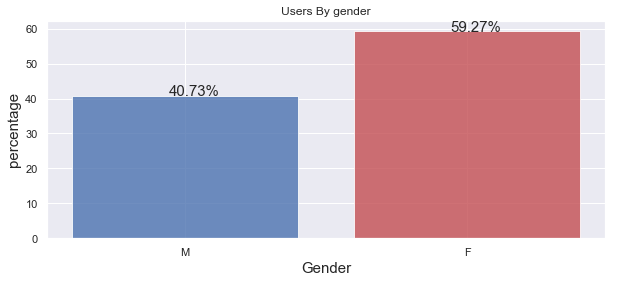

In [17]:
sns.set()
data=pd.read_csv(r"C:\Users\DAVID SEO\Desktop\data_practice\facebook\test_by_gender.csv")
print(data)
fig,ax=plt.subplots(figsize=(10,4))
ax.bar(data.gender,data.proportion,color=['b','r'],alpha=0.8)
ax.set_xlabel("Gender",fontsize=15)
ax.set_ylabel("percentage",fontsize=15)
ax.set_title("Users By gender")
totals=[]
for i in ax.patches:
    totals.append(i.get_height())
total=sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.34,i.get_height(),str(i.get_height()/total*100)+'%',fontsize=15)


#### commnets:
The above chart shows that % of facebook users of each sex and we can immediately see that the female users are nearly 20% more than male. To get a clear insight of our given  data, let's look at the age distribution of the social networktsite users. 


### 3.2 Age distribution of Facebook users

```sql
WITH modified_data AS( 
     --reference to the above_code),
     final_data AS(
       --reference to the above_code)
      SELECT DISTINCT age_group,
                  ROUND(CAST(COUNT(1) OVER(PARTITION BY age_group) AS NUMERIC)/COUNT(1) OVER()*100,2) AS proportion
                  FROM final_data
                  ORDER BY age_group;
```


In [18]:
data2=pd.read_csv(r"C:\Users\DAVID SEO\Desktop\data_practice\facebook\test_by_agegroup.csv")
data2


,age_group,proportion
0,F1,25.55
1,F2,8.36
2,F3,6.38
3,F4,6.14
4,M1,13.70
5,M2,5.90
6,M3,7.20
7,M4,5.53
8,T,21.23


Text(0.5, 1.0, 'Pie chart:age distribution of facebook users')

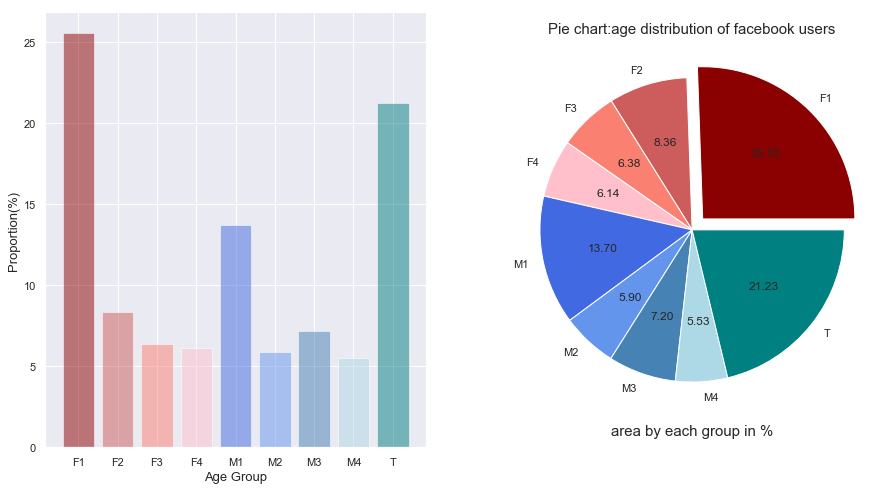

In [19]:
sns.set()
color=["darkred","indianred","salmon","pink","royalblue","cornflowerblue","steelblue","lightblue","teal"]
fig,ax=plt.subplots(1,2,figsize=(15,8))
ax[0].bar(data2.age_group,data2.proportion,color=color,alpha=0.5)
ax[0].set_xlabel("Age Group",fontsize=13)
ax[0].set_ylabel("Proportion(%)",fontsize=13)

explode=[0.1,0,0,0,0,0,0,0,0]
ax[1].pie(data2.proportion,explode=explode,labels=data2.age_group,autopct='%0.2f',colors=color)
ax[1].set_xlabel("area by each group in %",fontsize=15)
ax[1].set_title("Pie chart:age distribution of facebook users",fontsize=15)

## comments 


As with the result of sex distriubtion, the most loyal group is disproportionately women and thier age lie between 20 and 34. 
By some accounts, women in between 20's and 30's reported spending as twice much time on SNS than any other age-group.
The group is followed in useage by teen age users comprising round 21 % of the total users. Regardless of gender, there is a pronounced plummet in percentage (nearly 17% decrease for female and 8 % for male). 

### 3.3 Which is the Better Platform for Facebook?
#### 3.3.1 PC VS Mobile 

### SQL code
```sql
WITH modified_data AS( 
     --reference to the above_code),
     final_data AS(
       --reference to the above_code),
       ,platform_group AS(
       SELECT CAST(SUM(mobile_likes+mobile_likes_received) AS NUMERIC)/SUM         
              (mobile_likes+mobile_likes_received+www_likes+www_likes_received)*100 AS mobile,
               CAST(SUM(www_likes+www_likes_received) AS NUMERIC)/SUM     
              (mobile_likes+mobile_likes_received+www_likes+www_likes_received)*100 AS pc
              FROM final_data)
        SELECT CASE WHEN q.idx=1 THEN 'mobile'
                       WHEN q.idx=2 THEN 'pc' END AS device,
                  CASE WHEN q.idx=1 THEN p.mobile
                       WHEN q.idx=2 THEN p.pc END AS proportion
         FROM platform_group AS p
                     CROSS JOIN (SELECT 1 AS idx
                                       UNION ALL SELECT 2 AS idx) AS q
```


Text(0.5, 1.0, 'Getting an access to Facebook via either smartphone or pc')

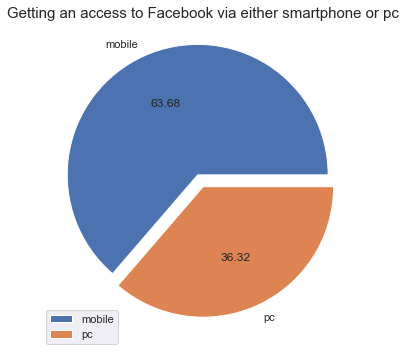

In [20]:
fig,ax=plt.subplots(figsize=(10,6))
data3=pd.read_csv(r"C:\Users\DAVID SEO\Desktop\data_practice\facebook\test_by_device.csv")
explode=(0.1,0)
plt.pie(data3.proportion,labels=data3.device,explode=explode,autopct='%0.2f')
ax.legend()
ax.set_title("Getting an access to Facebook via either smartphone or pc",fontsize=15)

The charts is showing that nearly as double in popularity as via pc is the getting accessing to facebook via smartphone which has brought out an unprecedented level of popularity of the major  Social Network Sites.Compared to the 'tranditional' electrical device incling computers,laptop, with double click on the application, smartphone lets users get an acess to SNS  in a little bit. Now we are easily aware  the fast and convenience smartphone_based social networking service is the most widely used as a social platform. 

#### 3.3.2 Age Distribution of Platform Useage


#### - SQL queries for data4
```sql
WITH modified_data AS( 
     --reference to the above_code),
     final_data AS(
       --reference to the above_code),
      plat_form AS(SELECT
                age_group,
                CONCAT(round(CAST(SUM(mobile_counts) AS NUMERIC)/SUM(counts)*100,2),'%') AS mobile,
                CONCAT(round(CAST(SUM(pc_counts) AS NUMERIC)/SUM(counts)*100,2),'%') AS pc
                FROM final_data
                GROUP BY age_group
                ORDER BY age_group)
          SELECT p.age_group,
                 CASE WHEN q.idx=1 THEN 'mobile'
                      WHEN q.idx=2 THEN 'pc' END AS device,
                 CASE WHEN q.idx=1 THEN p.mobile
                      WHEN q.idx=2 THEN p.pc END AS proportion
                 FROM plat_form AS p
                      CROSS JOIN (SELECT 1 AS idx
                                        UNION ALL SELECT 2 as idx) q
```


#### SQL quires for data5

```
WITH modified_data AS( 
     --reference to the above_code),
     final_data AS(
       --reference to the above_code),
          plat_form AS(SELECT
                age_group,
                round(CAST(SUM(mobile_counts) AS NUMERIC)/SUM(counts)*100,2) AS mobile,
                round(CAST(SUM(pc_counts) AS NUMERIC)/SUM(counts)*100,2) AS pc
                FROM final_data
                GROUP BY age_group
                ORDER BY age_group)
          SELECT * FROM plat_form;
```


     
     

In [21]:
data4=pd.read_csv(r"C:\Users\DAVID SEO\Desktop\data_practice\facebook\test_by_device_age.csv")
data4.iloc[1::2,0]=''
data4

,age_group,device,proportion
0,F1,mobile,70.70%
1,,pc,29.30%
2,F2,mobile,71.37%
3,,pc,28.63%
4,F3,mobile,58.85%
5,,pc,41.15%
6,F4,mobile,58.92%
7,,pc,41.08%
8,M1,mobile,67.78%
9,,pc,32.22%


  age_group  mobile     pc
0        F1   70.70  29.30
1        F2   71.37  28.63
2        F3   58.85  41.15
3        F4   58.92  41.08
4        M1   67.78  32.22
5        M2   65.58  34.42
6        M3   53.71  46.29
7        M4   54.86  45.14
8         T   62.55  37.45


'\nNote: attemptin to set new x tick labelsw onto the automatically assinged x_ticks. Without, seting the \ntick loactions, the new x tick should be misarranged.Thefore, set the location first and assign \nthe corresponding new x tick labels. \n'

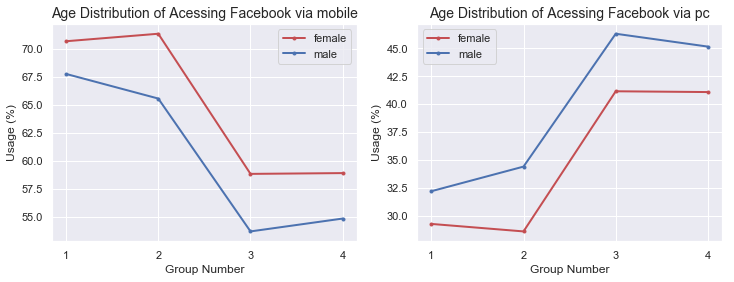

In [22]:
data5=pd.read_csv(r"C:\Users\DAVID SEO\Desktop\data_practice\facebook\test_by_device_age_2.csv")
print(data5)
fig,ax=plt.subplots(1,2,figsize=(12,4))


for i,j in enumerate(['mobile','pc']):
    ax[i].plot([1,2,3,4],data5[j].iloc[:4],label="female",marker='.',linewidth=2,color='r')#female
    ax[i].plot([1,2,3,4],data5[j].iloc[4:8],label='male',marker='.',linewidth=2,color='b')
    ax[i].set_xticks([1,2,3,4])
    ax[i].set_xticklabels([1,2,3,4])
    ax[i].legend()
    ax[i].set_xlabel("Group Number")
    ax[i].set_ylabel("Usage (%)")
    ax[i].set_title("Age Distribution of Acessing Facebook via "+ j,fontsize=14)

'''
Note: attemptin to set new x tick labelsw onto the automatically assinged x_ticks. Without, seting the 
tick loactions, the new x tick should be misarranged.Thefore, set the location first and assign 
the corresponding new x tick labels. 
'''


Smartphoe device has experienced a huge boom in the last decade among consumers aged between 20's and 30's.On the other hand, a relatively samller number of people over 40's have adopted it as thier telecomuication device in the past year due to unfamiliarity and technical difficulty of handling it. Correspondingly, of those in group 1 who uses facebook, more than 70 % for women and
67% for men use the flatform service via samrtphone. The use of mobile has kept steadily decreasing across group number with the lowest number scored at below 60% and 55% for women and men belong to gorup 3 followed by a slight increase. 



### 3.4 Cusotomer loyalty based on tenure 


```sql
WITH modified_data AS(
   SELECT user_id,
          CAST(age AS NUMERIC) AS age,
          CASE WHEN gender<>'female' THEN 'F'
               WHEN gender<>'male' THEN 'M'
               END AS gender,
          tenure/365 AS tenure, --conversion of days based on yearly basis 
          likes,
          likes_received
          FROM facebooktbl 
              WHERE facebooktbl IS NOT NULL)
          ,tenure_data AS(
           SELECT CONCAT( CASE WHEN age<20 THEN ''
                               ELSE gender END ,
                           CASE WHEN age BETWEEN 13 AND 19 THEN 'T'
                                WHEN age BETWEEN 20 AND 34 THEN '1'
                                WHEN age BETWEEN 35 AND 49 THEN '2'
                                WHEN age BETWEEN 50 AND 64 THEN '3'
                                WHEN age>=65 THEN '4' END) AS age_group,
                   gender,
                   CASE WHEN tenure BETWEEN 0 AND 1 THEN '0-1 year'
                        WHEN tenure BETWEEN 1 AND 2 THEN '1-2 year'
                        WHEN tenure BETWEEN 2 AND 3 THEN '2-3 year'
                        WHEN tenure BETWEEN 4 AND 5 THEN '4-5 year'   
                        WHEN tenure BETWEEN 5 AND 6 THEN '5-6 year'
                        WHEN tenure BETWEEN 7 AND 8 THEN '7-8 year'
                        WHEN tenure BETWEEN 9 AND 10 THEN '9-10 year' END AS tenure_group,
                   likes,
                   likes_received
                    FROM modified_data)
         SELECT Distinct tenure_group,
                         ROUND(CAST(COUNT(tenure_group)OVER(PARTITION BY tenure_group) AS NUMERIC)/
                               COUNT(tenure_group) OVER()*100,2) AS proportion
                         FROM tenure_data
                         ORDER BY tenure_group;


  ```
  

  tenure_group  proportion
0     0-1 year       77.88
1     1-2 year       10.00
2     2-3 year        5.50
3     4-5 year        6.05
4     5-6 year        0.55
5     7-8 year        0.02


Text(0.5, 1.0, 'Piecharts:Rentation Rate across 10 Groups')

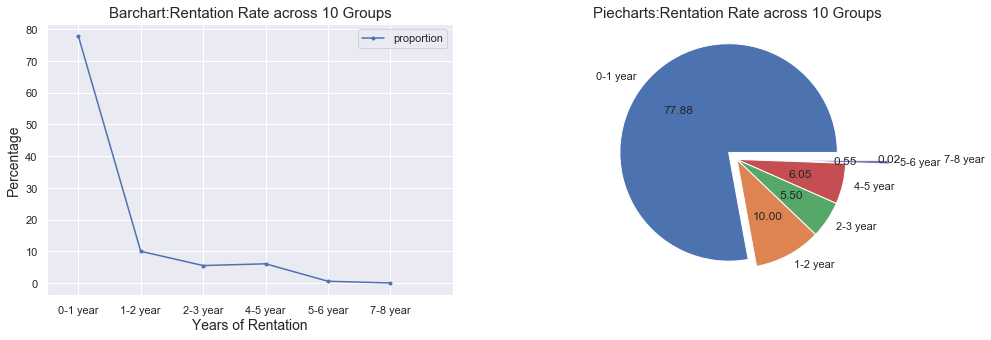

In [152]:
data6=pd.read_csv(r"C:\Users\DAVID SEO\Desktop\data_practice\facebook\tenure_by_year.csv")
print(data6)
# plot chart 
a=pd.Series([''])#assign the first index no label
b=pd.Series(data6.tenure_group.unique())#return all the unique values of tenure_group
labels=pd.concat([a,b])
fig,ax=plt.subplots(1,2,figsize=(16,5))
data6.plot(ax=ax[0],marker='.')
ax[0].set_xticks([-0.5,0,1,2,3,4,5,6])
ax[0].set_xticklabels(labels)
ax[0].set_xlabel("Years of Rentation",fontsize=14)
ax[0].set_ylabel("Percentage",fontsize=14)
ax[0].set_title("Barchart:Retention Rate across 10 Groups",fontsize=15)
# pie-chart

explode=(0.1,0,0,0,0.4,0.8)
ax[1].pie(x=data6.proportion,labels=data6.tenure_group,explode=explode,autopct='%.2f')
ax[1].set_title("Piecharts:Retention Rate across 10 Groups",fontsize=15)

### commnets
A majority of retaining year is lying between 0 and 1 year after which there is a dramatic fall to 10 % followed by a less steep decrease. 
Around five years after users joined Facebook, almost all of them cease to use the service and look for rival flatform services.  Facebook needs to take a thorough and detailed investigation to prevent customer churn from  taking place usually within  1 year. 


WITH modified_data AS(
                -- refer to quries on the section of 'cusotomer loyalty based on tenure'  ),
                   tenure_gender AS(
                         SELECT gender,
                           tenure_group,
                           COUNT(1)AS count
                           FROM tenure_data
                           GROUP BY gender,tenure_group
                           ORDER BY gender)
                     

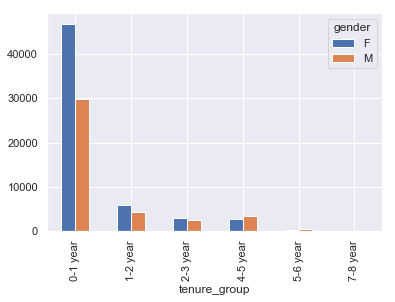

In [178]:
data7=pd.read_csv(r"C:\Users\DAVID SEO\Desktop\data_practice\facebook\tenure_by_gender.csv")
data7.pivot_table("count",index="tenure_group",columns="gender").plot(kind='bar')